<a href="https://colab.research.google.com/github/HyeJeongIm/BP_Project/blob/main/%08BP_hv3_2(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# batch_size

In [ ]:
import h5py
# from vis.visualization import visualize_cam, overlay
from tensorflow.keras import activations
#from vis.utils import utils
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import tensorflow.compat.v1 as tf
import tensorflow.keras as keras
# from tensorflow.python.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta, Nadam
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
from scipy import io
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
TensorFlow version :  2.8.2
Keras version :  2.8.0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
from scipy import io

# 데이터 파일 불러z오기
train_data = io.loadmat('/content/gdrive/MyDrive/BP/hz/v3/train_shuffled_raw_v3.mat')
test_data = io.loadmat('/content/gdrive/MyDrive/BP/hz/v3/test_not_shuffled_raw_v3.mat')

X_train = train_data['data_shuffled']
X_test = test_data['data_not_shuffled']

sbp_train = train_data['sbp_total']
sbp_test = test_data['sbp_total']
dbp_train = train_data['dbp_total']
dbp_test = test_data['dbp_total']


In [ ]:
print(X_train.shape)
print(X_test.shape) 

print(sbp_train.shape)
print(sbp_test.shape)
print(dbp_train.shape)
print(dbp_test.shape)

(168743, 127)
(43293, 127)
(168743, 1)
(43293, 1)
(168743, 1)
(43293, 1)


In [ ]:
import pandas as pd

df_train_raw = pd.DataFrame(X_train)
df_train_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.397525,0.576176,0.782368,0.343816,0.0,0.325039,0.166250,0.58625,0.141250,0.130000,...,0.21750,0.193750,0.172500,0.151250,0.131250,0.111250,0.08875,0.061250,0.577695,0.334739
1,0.403687,0.576176,0.782368,0.343816,0.0,0.309897,0.166250,0.57500,0.140000,0.129375,...,0.21625,0.195000,0.173750,0.152500,0.132500,0.112500,0.08875,0.062500,0.588482,0.335669
2,0.405556,0.576176,0.782368,0.343816,0.0,0.317237,0.163750,0.57500,0.138125,0.127500,...,0.22375,0.201250,0.180000,0.158750,0.137500,0.115000,0.09250,0.063750,0.694625,0.386111
3,0.396543,0.576176,0.782368,0.343816,0.0,0.315348,0.168750,0.58875,0.140000,0.130000,...,0.22500,0.203125,0.180625,0.158125,0.136875,0.115625,0.09250,0.063125,0.701718,0.390863
4,0.391071,0.576176,0.782368,0.343816,0.0,0.320688,0.170625,0.59125,0.143750,0.131875,...,0.23000,0.207500,0.183750,0.161250,0.138750,0.116250,0.09250,0.063750,0.700430,0.381499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.264083,0.505748,0.826316,0.416961,0.0,0.491736,0.273750,0.84875,0.238750,0.215000,...,0.49875,0.351250,0.305000,0.259375,0.200625,0.148125,0.11000,0.073125,0.668204,0.339492
99,0.265455,0.505748,0.826316,0.416961,0.0,0.497504,0.325000,0.78750,0.275000,0.255000,...,0.31875,0.292500,0.265000,0.236250,0.202500,0.166250,0.12875,0.086250,0.535449,0.290942
100,0.258081,0.505748,0.826316,0.416961,0.0,0.498717,0.287500,0.80250,0.255000,0.230000,...,0.31500,0.287500,0.260625,0.230625,0.198750,0.163125,0.12625,0.084375,0.531307,0.294047
101,0.261381,0.505748,0.826316,0.416961,0.0,0.490427,0.335000,0.77625,0.291250,0.255000,...,0.30625,0.280000,0.252500,0.223750,0.192500,0.158750,0.12375,0.085000,0.550623,0.297881


In [ ]:
df_test_raw = pd.DataFrame(X_test)
df_test_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.409346,0.196754,0.843158,0.327208,0.0,0.334396,0.165625,0.568750,0.136875,0.126875,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
1,0.412235,0.196754,0.843158,0.327208,0.0,0.312476,0.165625,0.562500,0.137500,0.125625,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
2,0.407614,0.196754,0.843158,0.327208,0.0,0.326504,0.167500,0.568750,0.140000,0.128750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
3,0.407614,0.196754,0.843158,0.327208,0.0,0.356952,0.160000,0.577500,0.135000,0.123750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
4,0.401500,0.196754,0.843158,0.327208,0.0,0.341285,0.161250,0.582500,0.136250,0.126250,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.352657,0.521650,0.867368,0.406007,0.0,0.389110,0.208750,0.641250,0.174375,0.162500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
99,0.354369,0.521650,0.867368,0.406007,0.0,0.376453,0.203750,0.631250,0.170000,0.157500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
100,0.349282,0.521650,0.867368,0.406007,0.0,0.384221,0.214375,0.641875,0.181250,0.166250,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
101,0.350962,0.521650,0.867368,0.406007,0.0,0.384311,0.205625,0.646250,0.171250,0.158125,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698


In [ ]:
total_me = 0
total_std = 0

In [ ]:
#parameter

batch_size = 1024
epochs = 400
lrate = 0.001

# SBP

## 1

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(8, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 1024      
                                                                 
 batch_normalization (BatchN  (None, 8)                32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 batch_normalization_1 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 4)                 0

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/400
165/165 [==============================] - 4s 12ms/step - loss: 12215.5020 - val_loss: 11812.5557
Epoch 2/400
165/165 [==============================] - 2s 11ms/step - loss: 11872.0996 - val_loss: 10909.8789
Epoch 3/400
165/165 [==============================] - 1s 6ms/step - loss: 11470.5791 - val_loss: 11312.8564
Epoch 4/400
165/165 [==============================] - 1s 5ms/step - loss: 10978.4492 - val_loss: 10505.7158
Epoch 5/400
165/165 [==============================] - 1s 5ms/step - loss: 10390.5879 - val_loss: 10068.4619
Epoch 6/400
165/165 [==============================] - 1s 5ms/step - loss: 9724.9062 - val_loss: 9103.4502
Epoch 7/400
165/165 [==============================] - 1s 5ms/step - loss: 9001.2705 - val_loss: 9404.3262
Epoch 8/400
165/165 [==============================] - 1s 5ms/step - loss: 8226.7686 - val_loss: 8653.5664
Epoch 9/400
165/165 [==============================] - 1s 5ms/step - loss: 7435.9731 - val_loss: 7296.4673
Epoch 10/400
165/165 [===

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  0.6646462844211515 
MAE:  7.747621529664681 
SD:  10.26930476113225


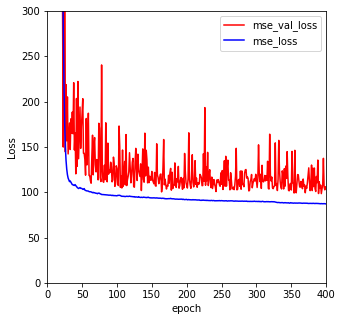

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 2

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(8, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 8)                 1024      
                                                                 
 batch_normalization_4 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 8)                 0         
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 batch_normalization_5 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 4)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/400
165/165 [==============================] - 2s 6ms/step - loss: 12556.8018 - val_loss: 12454.7773
Epoch 2/400
165/165 [==============================] - 1s 5ms/step - loss: 12338.7822 - val_loss: 12115.8389
Epoch 3/400
165/165 [==============================] - 1s 5ms/step - loss: 12170.9902 - val_loss: 11874.4736
Epoch 4/400
165/165 [==============================] - 1s 5ms/step - loss: 11992.6504 - val_loss: 11577.7920
Epoch 5/400
165/165 [==============================] - 1s 5ms/step - loss: 11789.2090 - val_loss: 11395.2998
Epoch 6/400
165/165 [==============================] - 1s 5ms/step - loss: 11561.5771 - val_loss: 11001.9541
Epoch 7/400
165/165 [==============================] - 1s 5ms/step - loss: 11312.1934 - val_loss: 11127.6299
Epoch 8/400
165/165 [==============================] - 1s 6ms/step - loss: 11041.5771 - val_loss: 10571.8848
Epoch 9/400
165/165 [==============================] - 1s 6ms/step - loss: 10752.0752 - val_loss: 10042.3125
Epoch 10/400
165/16

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -4.085688019036053 
MAE:  8.183134073790542 
SD:  9.862017907986475


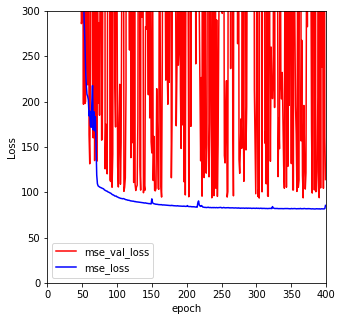

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 3

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(8, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 1024      
                                                                 
 batch_normalization_8 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 8)                 0         
                                                                 
 dense_11 (Dense)            (None, 4)                 36        
                                                                 
 batch_normalization_9 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 4)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/400
165/165 [==============================] - 2s 6ms/step - loss: 12493.0508 - val_loss: 12352.4395
Epoch 2/400
165/165 [==============================] - 1s 6ms/step - loss: 12277.7471 - val_loss: 12115.2949
Epoch 3/400
165/165 [==============================] - 1s 6ms/step - loss: 12062.0312 - val_loss: 11898.3701
Epoch 4/400
165/165 [==============================] - 1s 5ms/step - loss: 11818.6240 - val_loss: 11633.2246
Epoch 5/400
165/165 [==============================] - 1s 5ms/step - loss: 11532.6162 - val_loss: 11346.3047
Epoch 6/400
165/165 [==============================] - 1s 5ms/step - loss: 11206.9932 - val_loss: 10997.0254
Epoch 7/400
165/165 [==============================] - 1s 6ms/step - loss: 10844.3408 - val_loss: 10600.8359
Epoch 8/400
165/165 [==============================] - 1s 6ms/step - loss: 10449.8047 - val_loss: 10198.3770
Epoch 9/400
165/165 [==============================] - 1s 5ms/step - loss: 10027.7256 - val_loss: 9747.5605
Epoch 10/400
165/165

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -2.7266383171184874 
MAE:  7.85254583438778 
SD:  9.92826222089961


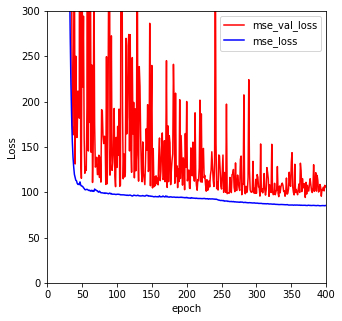

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

In [ ]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  -2.0492266839111295 
Ensemble_std:  10.019861630006112


# DBP

In [ ]:
total_me = 0
total_std = 0

## 1

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(8, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 8)                 1024      
                                                                 
 batch_normalization_12 (Bat  (None, 8)                32        
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 8)                 0         
                                                                 
 dense_16 (Dense)            (None, 4)                 36        
                                                                 
 batch_normalization_13 (Bat  (None, 4)                16        
 chNormalization)                                                
                                                                 
 activation_13 (Activation)  (None, 4)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/400
165/165 [==============================] - 2s 6ms/step - loss: 3705.2053 - val_loss: 3728.5337
Epoch 2/400
165/165 [==============================] - 1s 5ms/step - loss: 3564.9216 - val_loss: 3522.8149
Epoch 3/400
165/165 [==============================] - 1s 5ms/step - loss: 3376.6614 - val_loss: 3319.2031
Epoch 4/400
165/165 [==============================] - 1s 5ms/step - loss: 3142.6946 - val_loss: 2902.7998
Epoch 5/400
165/165 [==============================] - 1s 5ms/step - loss: 2872.7385 - val_loss: 2749.1282
Epoch 6/400
165/165 [==============================] - 1s 6ms/step - loss: 2578.0188 - val_loss: 2334.1694
Epoch 7/400
165/165 [==============================] - 1s 5ms/step - loss: 2270.0613 - val_loss: 2232.5537
Epoch 8/400
165/165 [==============================] - 1s 5ms/step - loss: 1904.0618 - val_loss: 1814.2632
Epoch 9/400
165/165 [==============================] - 1s 5ms/step - loss: 1542.9641 - val_loss: 1374.5748
Epoch 10/400
165/165 [===============

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -1.329629969181517 
MAE:  4.684796549654936 
SD:  6.068999256845191


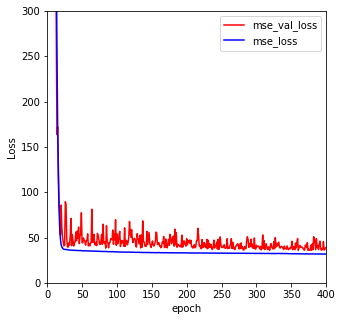

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 2

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(8, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 8)                 1024      
                                                                 
 batch_normalization_16 (Bat  (None, 8)                32        
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 8)                 0         
                                                                 
 dense_21 (Dense)            (None, 4)                 36        
                                                                 
 batch_normalization_17 (Bat  (None, 4)                16        
 chNormalization)                                                
                                                                 
 activation_17 (Activation)  (None, 4)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/400
165/165 [==============================] - 2s 6ms/step - loss: 3693.4041 - val_loss: 3717.3682
Epoch 2/400
165/165 [==============================] - 1s 5ms/step - loss: 3537.9231 - val_loss: 3572.2598
Epoch 3/400
165/165 [==============================] - 1s 5ms/step - loss: 3363.5559 - val_loss: 3310.8743
Epoch 4/400
165/165 [==============================] - 1s 5ms/step - loss: 3158.3320 - val_loss: 3096.2217
Epoch 5/400
165/165 [==============================] - 1s 6ms/step - loss: 2919.6489 - val_loss: 2928.6677
Epoch 6/400
165/165 [==============================] - 1s 5ms/step - loss: 2650.9810 - val_loss: 2479.7222
Epoch 7/400
165/165 [==============================] - 1s 5ms/step - loss: 2358.1323 - val_loss: 1924.9749
Epoch 8/400
165/165 [==============================] - 1s 5ms/step - loss: 2058.6252 - val_loss: 1848.4935
Epoch 9/400
165/165 [==============================] - 1s 5ms/step - loss: 1770.7562 - val_loss: 1746.8643
Epoch 10/400
165/165 [===============

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -0.34238954478731165 
MAE:  4.43402256373717 
SD:  5.982016765219863


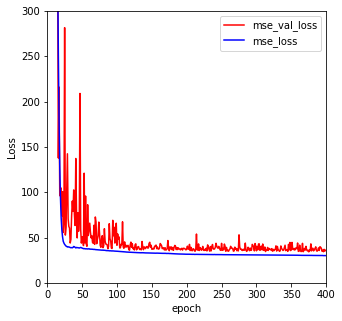

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 3

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(8, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 8)                 1024      
                                                                 
 batch_normalization_20 (Bat  (None, 8)                32        
 chNormalization)                                                
                                                                 
 activation_20 (Activation)  (None, 8)                 0         
                                                                 
 dense_26 (Dense)            (None, 4)                 36        
                                                                 
 batch_normalization_21 (Bat  (None, 4)                16        
 chNormalization)                                                
                                                                 
 activation_21 (Activation)  (None, 4)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/400
165/165 [==============================] - 2s 7ms/step - loss: 3768.7017 - val_loss: 3724.4385
Epoch 2/400
165/165 [==============================] - 1s 6ms/step - loss: 3646.3057 - val_loss: 3652.7288
Epoch 3/400
165/165 [==============================] - 1s 5ms/step - loss: 3532.5359 - val_loss: 3404.9629
Epoch 4/400
165/165 [==============================] - 1s 5ms/step - loss: 3399.4983 - val_loss: 3269.3289
Epoch 5/400
165/165 [==============================] - 1s 5ms/step - loss: 3251.3606 - val_loss: 3168.5120
Epoch 6/400
165/165 [==============================] - 1s 6ms/step - loss: 3090.4431 - val_loss: 3212.9858
Epoch 7/400
165/165 [==============================] - 1s 6ms/step - loss: 2884.2986 - val_loss: 2624.1692
Epoch 8/400
165/165 [==============================] - 1s 5ms/step - loss: 2644.9990 - val_loss: 2765.2004
Epoch 9/400
165/165 [==============================] - 1s 6ms/step - loss: 2419.8347 - val_loss: 2362.1265
Epoch 10/400
165/165 [===============

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -0.21569813420706238 
MAE:  4.770278615342466 
SD:  6.352321433784806


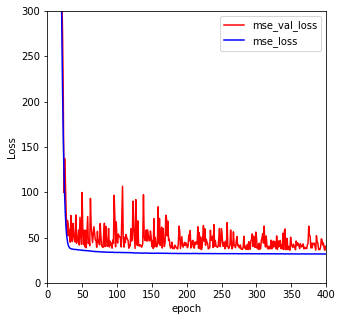

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

In [ ]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  -0.6292392160586303 
Ensemble_std:  6.13444581861662
